In [1]:
!pip install --upgrade --pre pythainlp
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<

In [4]:
!pip install gensim

In [7]:
!pip install numpy

Restart Runtime

In [101]:
import pandas as pd
import pythainlp
import gensim
import numpy as np
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [102]:
df=pd.read_csv('Sukee.csv')

In [103]:
df

,ReviewID,Review
0,1,ดูเป็นระเบียบมาก อาหารเสิร์ฟเร็ว พนักงานอัธยาศ...
1,2,เจอสาขานี้อยู่ไม่ไกลบ้าน เลยมาลองสักหน่อย ตัวร...
2,3,ส่วนตัวคิดว่าวัตถุดิบค่อนข้างดี เมื่อเทียบกับร...
3,4,เรามาตอนเที่ยงกว่าๆ คนเยอะมาก รอคิวประมาณครึ่ง...
4,5,เมนูเยอะอยู่ครับ อิ่มจุกกันแน่นอน อาหารเสิร์ฟไ...
5,6,ผมชอบกินแมงกะพรุนมาก ร้านนี้แมงกะพรุน ใหญ่ เยอ...
6,7,เมนูเยอะ คุณภาพโอเค น้ำจิ้มอร่อย
7,8,ที่จอดรถ ใหญ่โต กว้างขวาง จอดสบาย
8,9,หมูลาวาคือดี เป็นหมูหมักเนื้อนุ่มและไข่ไก่ เนื...
9,10,ข้อเสีย ถ้าหิวข้าวเที่ยง ต้องไปถึงก่อนเที่ยง เ...


In [122]:
#Tokenize Words
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['',' ','  ','\n','ค่ะ','คะ','ก้อ','อ่า','ครับ','เค้า','ร้าน','\u200b','นะคะ','ๆ','('')','(',')','(' ,')','(' , ')','(', ')','โอเค','"','"', 'กก' , 'Got' , 'To' , 'Grill']
screening_words = stopwords + removed_words

def tokenize_with_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize(str(sentence), engine='newmm')
    for word in words:
        if word not in screening_words:
            merged = merged + ',' + word
    return merged[1:]

In [123]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_space(x))

In [124]:
df.tail()

,ReviewID,Review,Review_tokenized,topics,score
15,16,ถ้ามาจะต้องรอคิวนานหน่อยนะ แต่ก้อคุ้มที่จะรออ่...,"รอ,คิว,คุ้ม,ที่จะ,รอ,อร่อย",2,0.976518
16,17,น้ำจิ้มสุกี้ก็โอเค แต่ซีฟู้ดจะแอบติดเปรี้ยวหวา...,"น้ำจิ้ม,สุกี้,ซี,ฟู้ด,แอบ,ติด,เปรี้ยวหวาน,เกิน...",1,0.986888
17,18,คุณภาพอาหารเหมาะสมกับราคา มีอาหารให้เลือกหลากห...,"คุณภาพ,อาหาร,เหมาะสม,ราคา,อาหาร,เลือก,หลากหลาย...",2,0.989723
18,19,สุกี้ราคาประหยัด เมนูอาหารหลากหลาย รวมๆแล้วคือ...,"สุกี้,ราคา,ประหยัด,เมนู,อาหาร,หลากหลาย,ดี,มีโอ...",2,0.986976
19,20,ตัวน้ำจิ้มสุกี้อะค่ะรู้สึกว่ายังธรรมดาไป เป็นน...,"ตัว,น้ำจิ้ม,สุกี้,อะ,รู้สึก,ธรรมดา,น้ำจิ้ม,หาก...",1,0.988610


In [125]:
#Create Dictionary
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [126]:
print(dictionary.token2id.keys())

dict_keys(['คน', 'ดี', 'ดู', 'ตี๋', 'พนักงาน', 'สาขา', 'สุกี้', 'อัธยาศัย', 'อาหาร', 'เป็นระเบียบ', 'เสิร์ฟ', 'โดยรวม', 'ตัว', 'ที่จอดรถ', 'บ้าน', 'ลอง', 'สักหน่อย', 'เจอ', 'ชอบ', 'ตอก', 'ราคา', 'วัตถุดิบ', 'สวย', 'ส่วนตัว', 'หมู', 'อร่อย', 'เทียบ', 'เนื้อหมู', 'เมนู', 'ไข่', 'ครึ่ง', 'คิว', 'ชั่วโมง', 'ตอนเที่ยง', 'รอ', 'จุก', 'อิ่ม', 'แน่นอน', 'ไว', 'กิน', 'ผม', 'สะใจ', 'แมงกะพรุน', 'คุณภาพ', 'น้ำจิ้ม', 'จอด', 'ความนุ่ม', 'ดีมาก', 'นุ่ม', 'ลาวา', 'หมัก', 'เนื้อ', 'ไข่ไก่', 'ก่อนเที่ยง', 'ข้อเสีย', 'จอง', 'หิวข้าว', 'เต็ม', 'เที่ยง', 'ไม่งั้น', 'คุ้ม', 'ที่อยู่', 'บุฟเฟ่ต์', 'ไลน์', 'นิดนึง', 'พนักงานบริการ', 'กุ้ง', 'งาม', 'ชิ้น', 'ช้ำ', 'ดีงาม', 'ผักสด', 'สด', 'หมูสามชั้น', 'หวาน', 'กินกัน', 'ทั้งคืน', 'บรรยากาศ', 'สะอาด', 'ชาบู', 'ซี', 'ทีเด็ด', 'นิ้ม', 'น้ำ', 'ฟู้ด', 'ที่จะ', 'ติด', 'ถูกใจ', 'นัว', 'หมี่หยก', 'เกินไป', 'เปรี้ยวหวาน', 'เหมาะสม', 'แอบ', 'คุ้มค่า', 'ทาน', 'บุพ', 'รสชาติ', 'รู้สึก', 'หลากหลาย', 'เฟต์', 'เลือก', 'ซ้ำ', 'ประหยัด', 'มีโอกาส', 'ติดใจ', 'ทั่วไป', 'ธรรมดา',

In [127]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

In [128]:
#Topic Modeling
num_topics = 4
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every =1 # Don't evaluate model perplexity, takes too much time

#make a index to word dictionary
temp = dictionary[0] #This is only to load the dictionary
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                                    alpha='auto', eta='auto', \
                                    iterations=iterations, num_topics=num_topics, \
                                    passes=passes, eval_every=eval_every)

CPU times: user 279 ms, sys: 5.21 ms, total: 284 ms
Wall time: 1.18 s


In [129]:
pyLDAvis.gensim.prepare(model, gensim_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.079454 -0.051595       1        1  41.348415
3     -0.045242 -0.057025       2        1  30.933318
1      0.042252  0.082761       3        1  15.496493
0     -0.076464  0.025859       4        1  12.221773, topic_info=         Term      Freq     Total Category  logprob  loglift
44    น้ำจิ้ม  4.000000  4.000000  Default  30.0000  30.0000
25      อร่อย  3.000000  3.000000  Default  29.0000  29.0000
18        ชอบ  2.000000  2.000000  Default  28.0000  28.0000
42  แมงกะพรุน  1.000000  1.000000  Default  27.0000  27.0000
28       เมนู  2.000000  2.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
0          คน  0.110667  2.478073   Topic4  -5.2978  -1.0068
13   ที่จอดรถ  0.110615  2.538211   Topic4  -5.2982  -1.0312
24        หมู  0.110614  2.703898   Topic4  -5.2983  -1.0945
1          ดี  0.110614  5.930986   Topic4  -5.2983  -1.8799
8       อาหาร  0.110613  4.657995   Topic4  -5.2983  -1.6383

[196 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
39        4  0.974130         กิน
75        2  0.799589      กินกัน
66        3  0.921700        กุ้ง
53        2  0.799609  ก่อนเที่ยง
54        2  0.799610     ข้อเสีย
...     ...       ...         ...
29        2  0.799585         ไข่
52        1  0.762933      ไข่ไก่
59        2  0.799610     ไม่งั้น
63        1  0.762933        ไลน์
38        3  0.921700          ไว

[141 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [130]:
model.show_topic(0)

[('น้ำจิ้ม', 0.06499169),
 ('อร่อย', 0.064990975),
 ('แมงกะพรุน', 0.045001436),
 ('ชอบ', 0.04499643),
 ('ผม', 0.0250007),
 ('สะใจ', 0.0250007),
 ('กิน', 0.025000667),
 ('คุณภาพ', 0.025000533),
 ('เมนู', 0.025000528),
 ('นิ้ม', 0.024996046)]

In [131]:
model.show_topic(1)

[('อร่อย', 0.02233006),
 ('เมนู', 0.022320125),
 ('ชิ้น', 0.022320043),
 ('ผักสด', 0.022320036),
 ('ดีงาม', 0.022320036),
 ('หมูสามชั้น', 0.022320036),
 ('จุก', 0.022320032),
 ('งาม', 0.022320028),
 ('กุ้ง', 0.022320027),
 ('อิ่ม', 0.022320023)]

In [132]:
model.show_topic(2)

[('อาหาร', 0.041263517),
 ('ดี', 0.031556096),
 ('ราคา', 0.03155356),
 ('หมู', 0.021846214),
 ('ที่จอดรถ', 0.021845572),
 ('คิว', 0.02184531),
 ('รอ', 0.02184531),
 ('ดีมาก', 0.021845195),
 ('สาขา', 0.021845145),
 ('คุ้ม', 0.021845117)]

In [133]:
model.show_topic(3)

[('ดี', 0.050592717),
 ('น้ำจิ้ม', 0.03869789),
 ('สุกี้', 0.026789233),
 ('ราคา', 0.026786238),
 ('ดีมาก', 0.026785376),
 ('เมนู', 0.026784254),
 ('คิว', 0.026783817),
 ('รอ', 0.026783649),
 ('ซี', 0.014886628),
 ('ธรรมดา', 0.014880742)]

In [134]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [135]:
sorted_df = df.sort_values(by='topics')


In [136]:
sorted_df

,ReviewID,Review,Review_tokenized,topics,score
5,6,ผมชอบกินแมงกะพรุนมาก ร้านนี้แมงกะพรุน ใหญ่ เยอ...,"ผม,ชอบ,กิน,แมงกะพรุน,แมงกะพรุน,สะใจ",0,0.971338
6,7,เมนูเยอะ คุณภาพโอเค น้ำจิ้มอร่อย,"เมนู,คุณภาพ,น้ำจิ้ม,อร่อย",0,0.957744
7,8,ที่จอดรถ ใหญ่โต กว้างขวาง จอดสบาย,"ที่จอดรถ,จอด",0,0.017412
14,15,ทีเด็ดคือน้ำจิ้มค่ะ น้ำจิ้มอร่อยมาก มีทั้งน้ำน...,"ทีเด็ด,น้ำจิ้ม,น้ำจิ้ม,อร่อย,น้ำ,นิ้ม,สุกี้,ซี...",0,0.985415
3,4,เรามาตอนเที่ยงกว่าๆ คนเยอะมาก รอคิวประมาณครึ่ง...,"ตอนเที่ยง,คน,รอ,คิว,ครึ่ง,ชั่วโมง",1,0.972404
4,5,เมนูเยอะอยู่ครับ อิ่มจุกกันแน่นอน อาหารเสิร์ฟไ...,"เมนู,อิ่ม,จุก,แน่นอน,อาหาร,เสิร์ฟ,ไว,พนักงาน,อ...",1,0.983208
12,13,กุ้งสด​ หวานอร่อย​ ผักสด​มาแบบงามๆเลย​ ไม่มีช้...,"กุ้ง,สด,หวาน,อร่อย,ผักสด,งาม,ช้ำ,หมูสามชั้น,ดี...",1,0.983208
0,1,ดูเป็นระเบียบมาก อาหารเสิร์ฟเร็ว พนักงานอัธยาศ...,"ดู,เป็นระเบียบ,อาหาร,เสิร์ฟ,พนักงาน,อัธยาศัย,ด...",2,0.988709
1,2,เจอสาขานี้อยู่ไม่ไกลบ้าน เลยมาลองสักหน่อย ตัวร...,"เจอ,สาขา,บ้าน,ลอง,สักหน่อย,ตัว,ที่จอดรถ",2,0.980886
17,18,คุณภาพอาหารเหมาะสมกับราคา มีอาหารให้เลือกหลากห...,"คุณภาพ,อาหาร,เหมาะสม,ราคา,อาหาร,เลือก,หลากหลาย...",2,0.990297


In [137]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

Heatmap of Top Keywords per Topic:

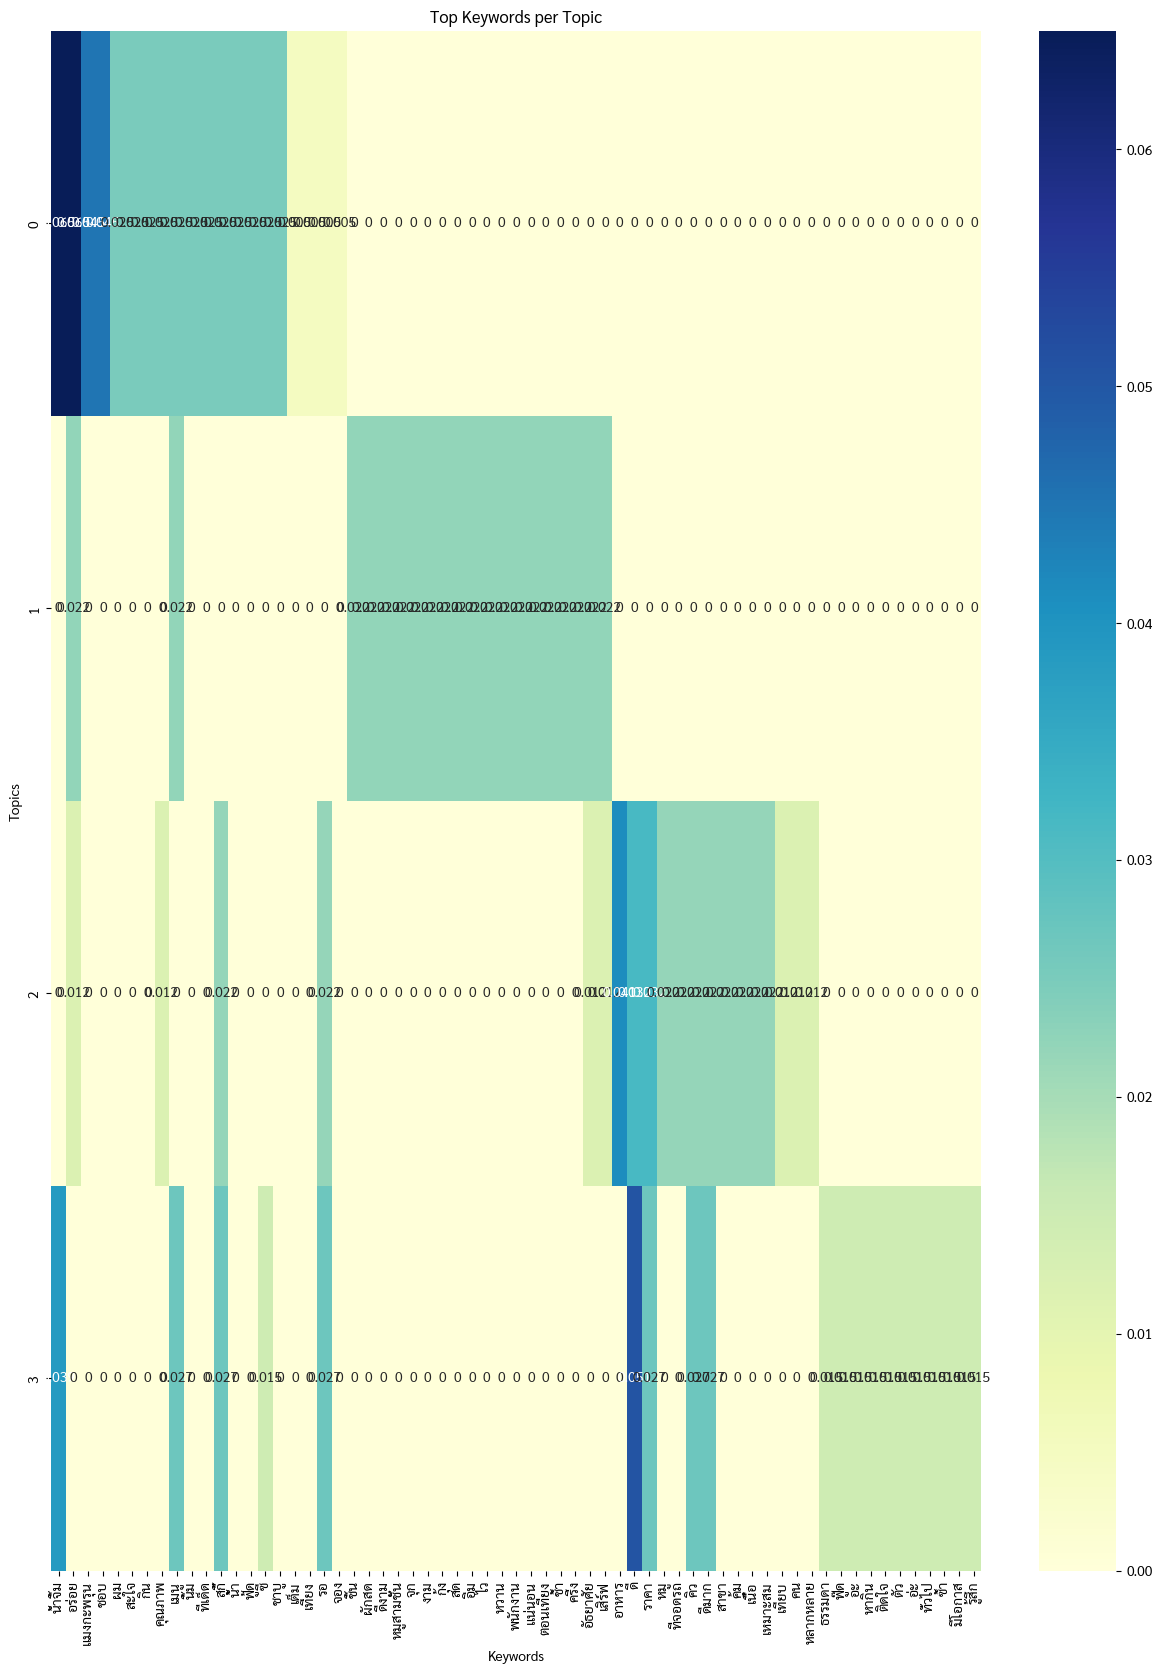

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract top keywords for each topic
n_keywords = 20
topics = model.show_topics(num_topics=num_topics, num_words=n_keywords, formatted=False)

# Build a dataframe from the topics
topic_keywords = {i: {t[0]: t[1] for t in topics[i][1]} for i in range(num_topics)}
df_topic_keywords = pd.DataFrame(topic_keywords).T.fillna(0)

# Plot heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(df_topic_keywords, cmap="YlGnBu", annot=True, cbar=True)
plt.title('Top Keywords per Topic')
plt.xlabel('Keywords')
plt.ylabel('Topics')
plt.show()


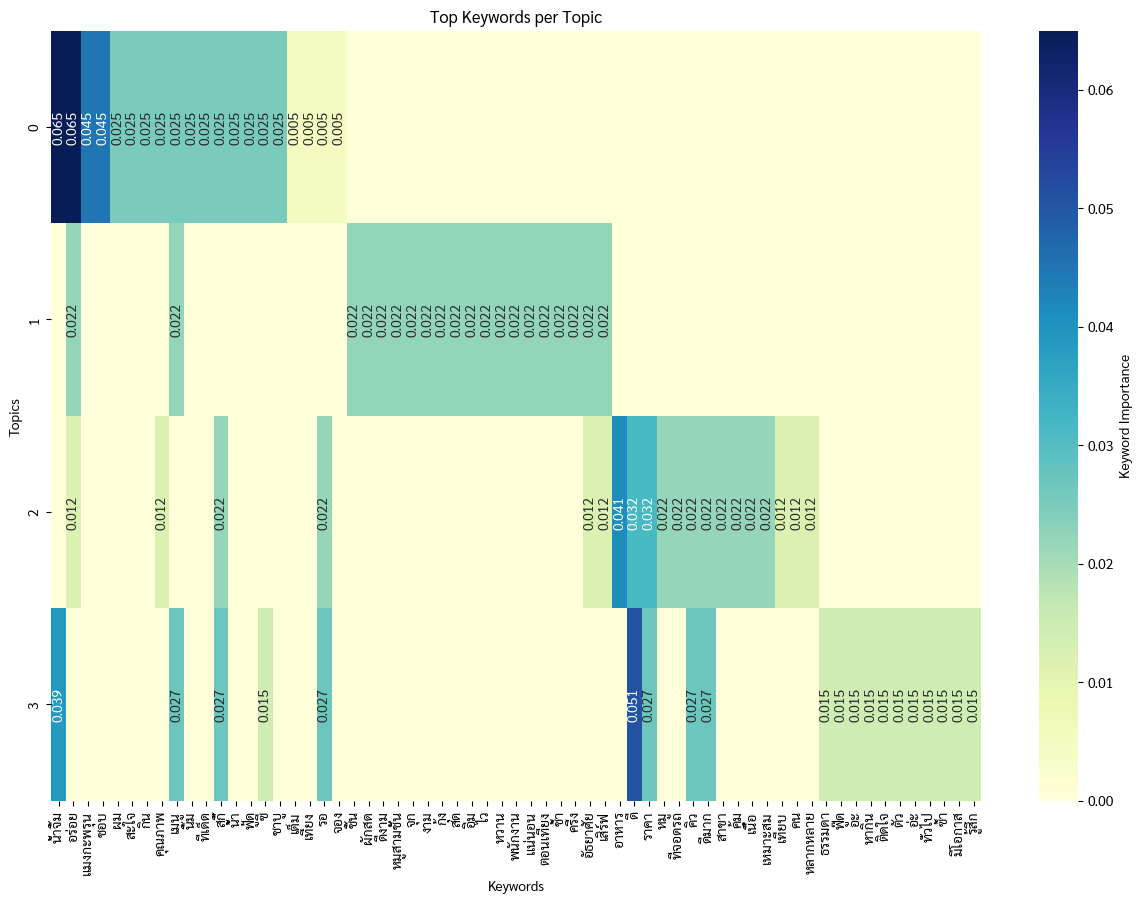

In [139]:
import numpy as np

# Set up a mask for the heatmap annotations to skip near-zero values
annotation_mask = np.vectorize(lambda x: '' if x < 0.001 else '{:.3f}'.format(x))(df_topic_keywords.values)

plt.figure(figsize=(15, 10))
sns.heatmap(df_topic_keywords, cmap="YlGnBu", annot=annotation_mask, fmt='', cbar=True, cbar_kws={'label': 'Keyword Importance'})

# Here's how you rotate the annotations
for text in plt.gca().texts:
    text.set_rotation(90)

plt.title('Top Keywords per Topic')
plt.xlabel('Keywords')
plt.ylabel('Topics')
plt.show()
